In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "ibm-hr-analytics-attrition-dataset"

In [2]:
# Configuración inicial
knitr::opts_chunk$set(echo = TRUE, warning = FALSE, message = FALSE, error=FALSE)
library(tidyverse)
library(corrplot)

corrplot 0.92 loaded



# Introducción

**HR Attrition** (rotación de personal) se refiere a la pérdida de empleados dentro de una organización, ya sea por renuncias voluntarias, despidos o jubilaciones. Este fenómeno puede tener un impacto significativo en la productividad, los costos y la cultura organizacional. En términos simples, la rotación mide cuántos empleados dejan la empresa durante un período de tiempo determinado.

# Contexto 

### Contexto del Dataset

Este análisis se realiza sobre un dataset proporcionado por **Kaggle**, titulado **"IBM HR Analytics Employee Attrition & Performance"**. El dataset fue creado por científicos de datos de IBM de manera ficticia con el objetivo de desvelar los factores que conducen a la rotación de empleados (attrition) y explorar preguntas clave como:

- ¿Cuál es la relación entre la distancia al hogar y el rol del trabajo en función de la rotación de empleados?
- ¿Cómo varía el ingreso mensual promedio según el nivel educativo y la rotación de empleados?

Este conjunto de datos ofrece una oportunidad para analizar diferentes aspectos relacionados con la rotación de empleados, como el rendimiento, la satisfacción laboral, los niveles de compensación y otros factores que podrían influir en la permanencia de los empleados dentro de la empresa.

Puedes acceder al dataset en Kaggle a través del siguiente enlace: [IBM HR Analytics Attrition Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)

## ¿Cómo el análisis de datos puede aportar en la rotación de personal?
El análisis de datos es una herramienta poderosa para abordar y gestionar la rotación de personal. Algunos beneficios clave incluyen:

- **Identificación de causas principales:**
Mediante la recopilación y análisis de datos de recursos humanos (edad, género, salario, desempeño, tiempo en la empresa, encuestas de satisfacción, entre otros), se pueden identificar patrones que explican por qué los empleados dejan la organización.

- **Predicción de rotación:**
Modelos predictivos como la regresión logística o técnicas avanzadas de machine learning pueden predecir qué empleados tienen mayor probabilidad de abandonar la empresa, permitiendo a los líderes tomar acciones preventivas.

- **Optimización de recursos:**
Reducir la rotación disminuye costos relacionados con el reclutamiento, capacitación y pérdida de productividad, permitiendo invertir recursos en estrategias más efectivas.

- **Mejoras en la retención:**
Con el análisis de datos, es posible diseñar estrategias específicas para retener talento clave, como mejorar las condiciones laborales, ajustar políticas de compensación o implementar planes de desarrollo profesional.

- **Medición del impacto de iniciativas:**
Al analizar datos históricos, se pueden evaluar las estrategias implementadas para reducir la rotación, identificando cuáles son efectivas y cuáles requieren ajustes.


# Analisis de datos

## Carga del Dataset


In [3]:
df <- read.csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv",header= TRUE)
glimpse(df)

Rows: 1,470
Columns: 35
$ Age                      <int> 41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2…
$ Attrition                <chr> "Yes", "No", "Yes", "No", "No", "No", "No", "…
$ BusinessTravel           <chr> "Travel_Rarely", "Travel_Frequently", "Travel…
$ DailyRate                <int> 1102, 279, 1373, 1392, 591, 1005, 1324, 1358,…
$ Department               <chr> "Sales", "Research & Development", "Research …
$ DistanceFromHome         <int> 1, 8, 2, 3, 2, 2, 3, 24, 23, 27, 16, 15, 26, …
$ Education                <int> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 3, …
$ EducationField           <chr> "Life Sciences", "Life Sciences", "Other", "L…
$ EmployeeCount            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ EmployeeNumber           <int> 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,…
$ EnvironmentSatisfaction  <int> 2, 3, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 2, 3, …
$ Gender                   <chr> "Female", "Male", "Male", "Female", "Male", "…
$ HourlyRate    

El dataset contiene 1470 observaciones y 35 columnas, muchas de las cuales están relacionadas con características de empleados, como edad, departamento, ingresos, satisfacción laboral, entre otras. Una de las variables clave es Attrition, que indica si un empleado dejó la empresa ("Yes") o no ("No").


## Resumen estadístico

In [4]:
# 1. Resumen general
summary(df)

      Age         Attrition         BusinessTravel       DailyRate     
 Min.   :18.00   Length:1470        Length:1470        Min.   : 102.0  
 1st Qu.:30.00   Class :character   Class :character   1st Qu.: 465.0  
 Median :36.00   Mode  :character   Mode  :character   Median : 802.0  
 Mean   :36.92                                         Mean   : 802.5  
 3rd Qu.:43.00                                         3rd Qu.:1157.0  
 Max.   :60.00                                         Max.   :1499.0  
  Department        DistanceFromHome   Education     EducationField    
 Length:1470        Min.   : 1.000   Min.   :1.000   Length:1470       
 Class :character   1st Qu.: 2.000   1st Qu.:2.000   Class :character  
 Mode  :character   Median : 7.000   Median :3.000   Mode  :character  
                    Mean   : 9.193   Mean   :2.913                     
                    3rd Qu.:14.000   3rd Qu.:4.000                     
                    Max.   :29.000   Max.   :5.000              

## Distribución de la variable objetivo Rotación (Attrition)
Este análisis muestra la proporción de empleados que permanecen y los que dejan la empresa. Es útil para entender la magnitud del problema de rotación.

Attrition,n,percentage
<chr>,<int>,<dbl>
No,1233,83.87755
Yes,237,16.12245


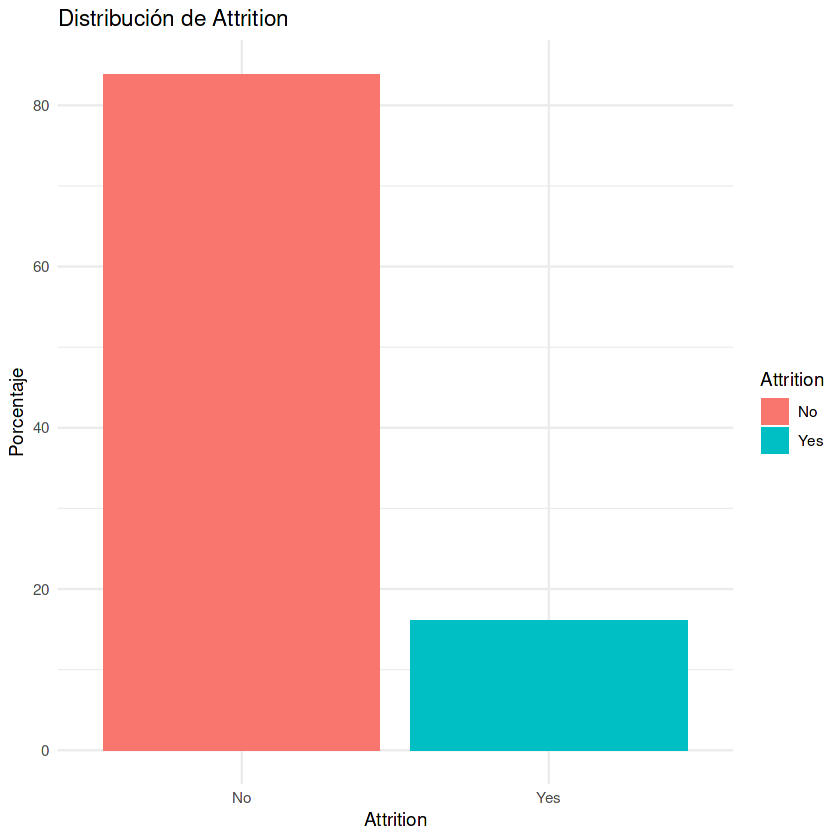

In [5]:
# Distribución de la variable Attrition
attrition_dist <- df %>%
  count(Attrition) %>%
  mutate(percentage = n / sum(n) * 100)

# Mostrar la distribución
attrition_dist

# Visualización
ggplot(attrition_dist, aes(x = Attrition, y = percentage, fill = Attrition)) +
  geom_bar(stat = "identity") +
  labs(title = "Distribución de Attrition",
       x = "Attrition",
       y = "Porcentaje") +
  theme_minimal()

**La proporción de empleados que dejan la empresa es significativa, con un 83.88% permaneciendo y un 16.12% abandonando. Esto indica que la rotación es un problema relevante que requiere atención.**

## Relación con variables

### Género y Rotación

Este análisis considera la proporción de empleados que dejan la empresa (Attrition) dentro de cada género (hombres y mujeres). El objetivo es identificar si un género está más afectado por la rotación, ajustando el análisis para la distribución de empleados por género en la empresa.

Gender,Attrition,count,total_by_gender,proportion
<chr>,<chr>,<int>,<int>,<dbl>
Female,No,501,588,85.20408
Female,Yes,87,588,14.79592
Male,No,732,882,82.99320
Male,Yes,150,882,17.00680


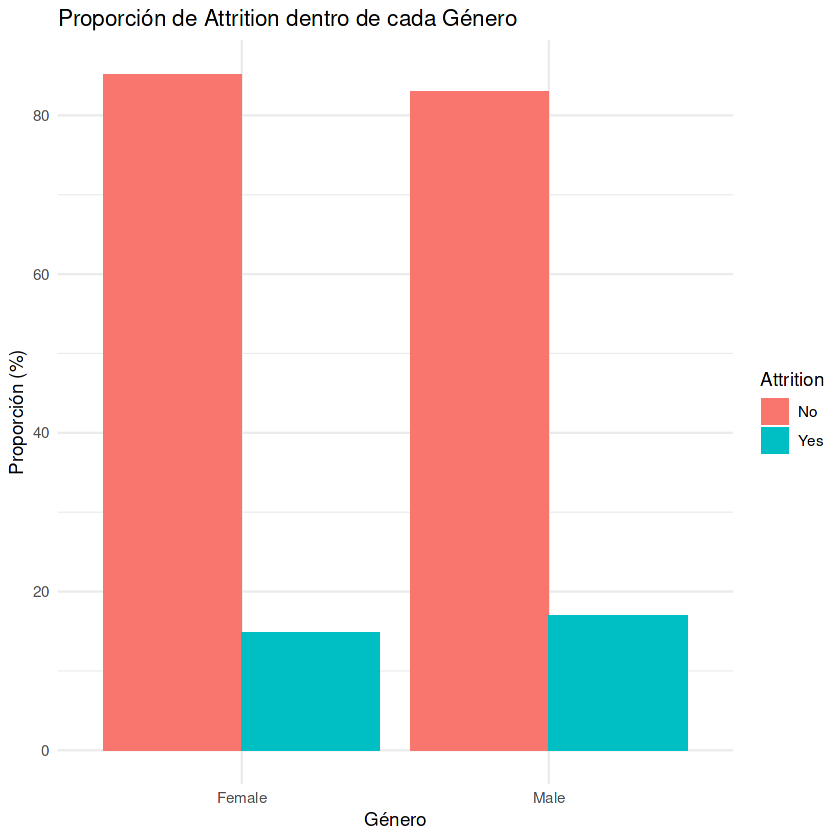

In [6]:
# Análisis de proporción de género respecto a Attrition
gender_attrition_prop <- df %>%
  group_by(Gender) %>%
  mutate(total_by_gender = n()) %>%
  group_by(Gender, Attrition) %>%
  summarise(count = n(), total_by_gender = first(total_by_gender), .groups = "drop") %>%
  mutate(proportion = (count / total_by_gender) * 100)

# Mostrar los resultados
gender_attrition_prop

# Visualización
ggplot(gender_attrition_prop, aes(x = Gender, y = proportion, fill = Attrition)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Proporción de Attrition dentro de cada Género",
       x = "Género",
       y = "Proporción (%)") +
  theme_minimal()

**El análisis revela que las Mujeres en un 14.80% abandonan la empresa, mientras que los Hombres en un  17.01% abandonan la empresa. Esto sugiere que los hombres tienen una tasa ligeramente mayor de rotación. **

### Ingresos Mensuales por Rotación

Se analiza si hay diferencias en los ingresos entre empleados que permanecen y los que dejan la empresa, lo que podría sugerir inequidades salariales como factor de rotación.

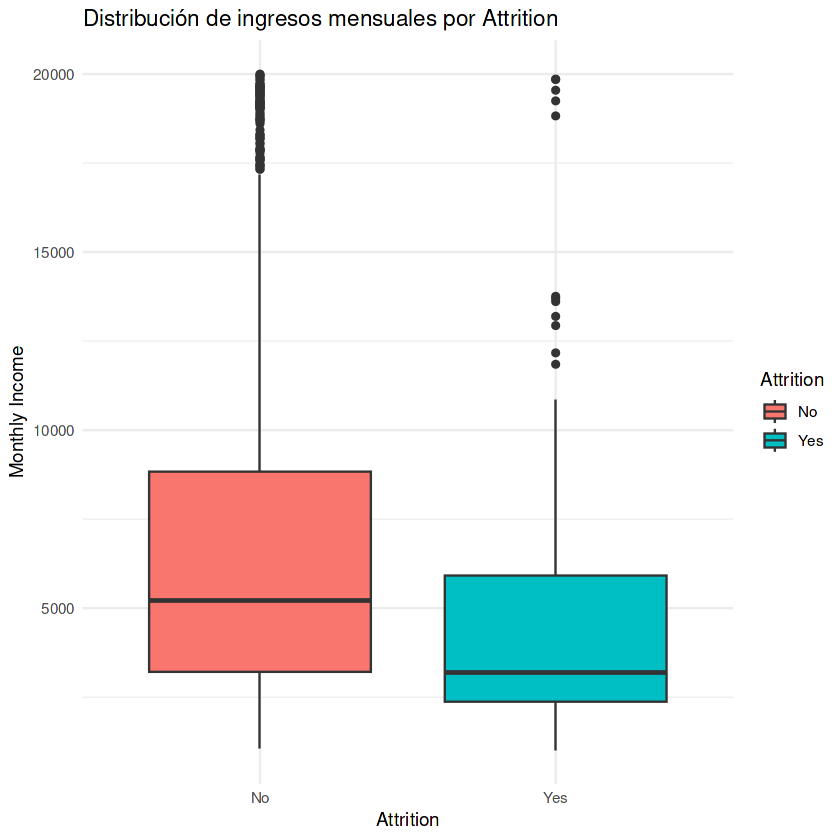

In [7]:
# Gráfico de ingresos mensuales
ggplot(df, aes(x = Attrition, y = MonthlyIncome, fill = Attrition)) +
  geom_boxplot() +
  labs(title = "Distribución de ingresos mensuales por Attrition",
       x = "Attrition",
       y = "Monthly Income") +
  theme_minimal()

**Se observa que los empleados con mayores ingresos tienden a permanecer más tiempo en la empresa, lo que podría indicar una relación entre satisfacción salarial y retención.**

### Trabajo Extra (OverTime) y Attrition

Aquí se evalúa si el trabajo extra (OverTime) está asociado con mayores tasas de rotación, lo que podría reflejar sobrecarga laboral o estrés.

OverTime,Attrition,count,total_by_overtime,proportion
<chr>,<chr>,<int>,<int>,<dbl>
No,No,944,1054,89.56357
No,Yes,110,1054,10.43643
Yes,No,289,416,69.47115
Yes,Yes,127,416,30.52885


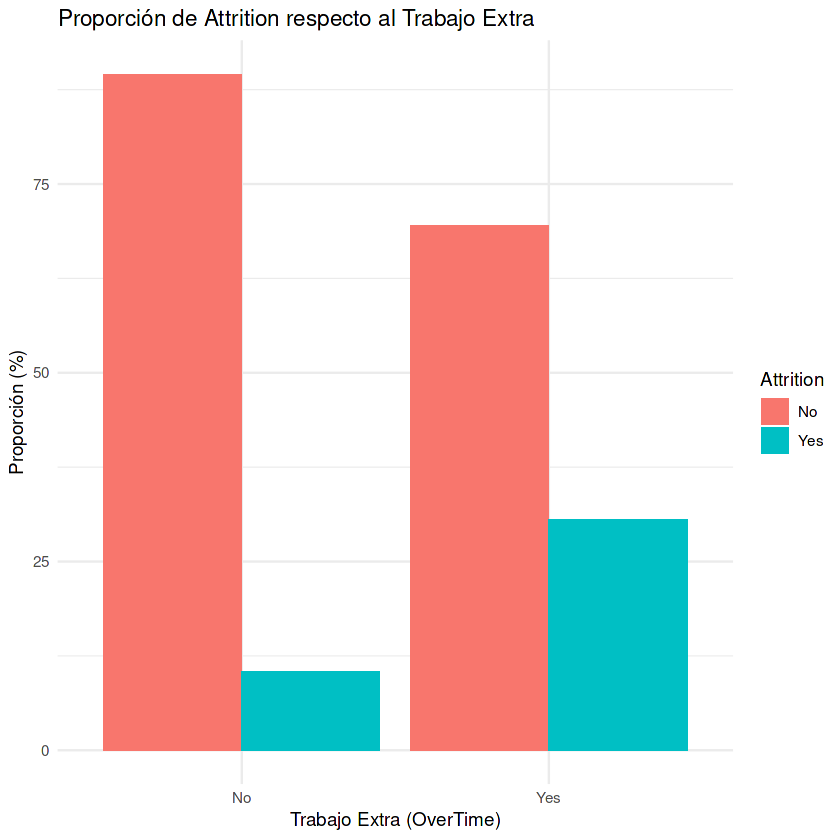

In [8]:
# Relación entre OverTime y Attrition
# Análisis de proporción de OverTime respecto a Attrition
overtime_attrition_prop <- df %>%
  group_by(OverTime) %>%
  mutate(total_by_overtime = n()) %>%
  group_by(OverTime, Attrition) %>%
  summarise(count = n(), total_by_overtime = first(total_by_overtime), .groups = "drop") %>%
  mutate(proportion = (count / total_by_overtime) * 100)

# Mostrar los resultados
overtime_attrition_prop

# Visualización
ggplot(overtime_attrition_prop, aes(x = OverTime, y = proportion, fill = Attrition)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Proporción de Attrition respecto al Trabajo Extra",
       x = "Trabajo Extra (OverTime)",
       y = "Proporción (%)") +
  theme_minimal()


**Los datos muestran que los empleados que trabajan horas extra tienen una tasa de rotación del 30.53%, lo que sugiere que el exceso de carga laboral puede ser un factor estresante que contribuye a la decisión de dejar la empresa.**

### Rotación por Edad
Este análisis evalúa la rotación (Attrition) por grupo de edad, para identificar si existe una relación entre las diferentes etapas de la vida laboral y la tendencia a dejar la empresa.


AgeGroup,Attrition,count,total_by_age,proportion
<fct>,<chr>,<int>,<int>,<dbl>
"[20,30]",No,279,369,75.60976
"[20,30]",Yes,90,369,24.39024
"(30,40]",No,534,619,86.26817
"(30,40]",Yes,85,619,13.73183
"(40,50]",No,288,322,89.44099
"(40,50]",Yes,34,322,10.55901
"(50,60]",No,125,143,87.41259
"(50,60]",Yes,18,143,12.58741
NA,No,7,17,41.17647


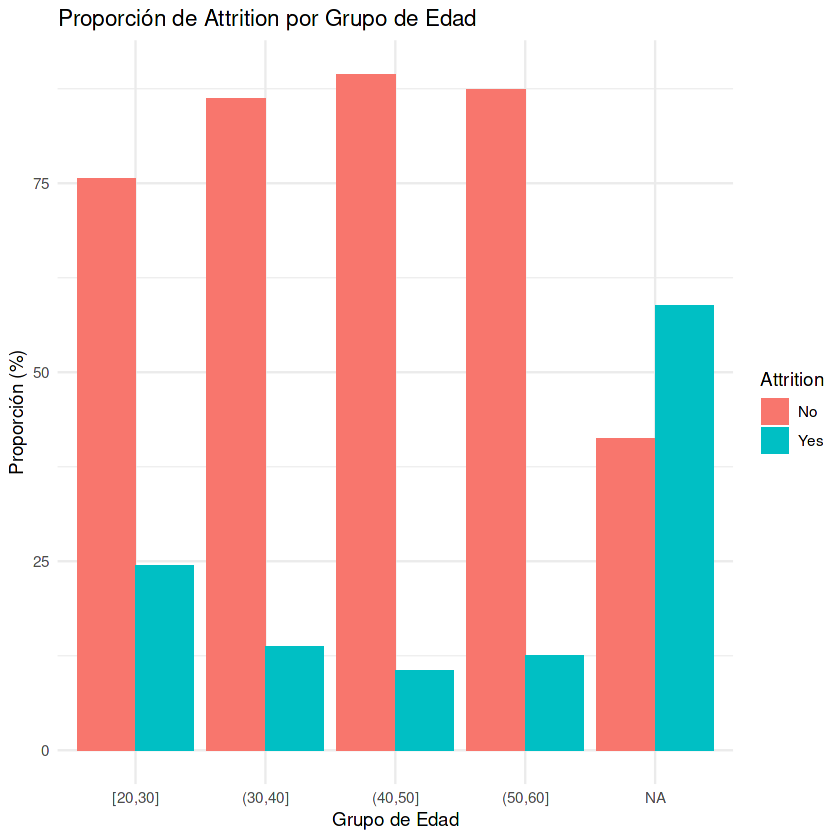

In [9]:
# Crear grupos de edad para análisis
df <- df %>%
  mutate(AgeGroup = cut(Age, breaks = seq(20, 60, by = 10), include.lowest = TRUE))

# Análisis de proporción por grupo de edad
age_attrition_prop <- df %>%
  group_by(AgeGroup) %>%
  mutate(total_by_age = n()) %>%
  group_by(AgeGroup, Attrition) %>%
  summarise(count = n(), total_by_age = first(total_by_age), .groups = "drop") %>%
  mutate(proportion = (count / total_by_age) * 100)

# Mostrar resultados
age_attrition_prop

# Visualización
ggplot(age_attrition_prop, aes(x = AgeGroup, y = proportion, fill = Attrition)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Proporción de Attrition por Grupo de Edad",
       x = "Grupo de Edad",
       y = "Proporción (%)") +
  theme_minimal()

**Los grupos más jóvenes (20-30 años) presentan una tasa de rotación del 24.39%, mientras que los empleados mayores (50-60 años) tienen una tasa del 12.59%. Esto indica que los empleados más jóvenes podrían estar más propensos a buscar nuevas oportunidades.**

### Rotación por años en la empresa

Este análisis examina la proporción de empleados que dejan la empresa según su antigüedad. Es útil para entender si los empleados más nuevos o aquellos con mayor tiempo en la empresa tienen una mayor tendencia a la rotación.

YearsAtCompanyGroup,Attrition,count,total_by_years,proportion
<fct>,<chr>,<int>,<int>,<dbl>
"[0,10]",No,1007,1224,82.271242
"[0,10]",Yes,217,1224,17.728758
"(10,20]",No,168,180,93.333333
"(10,20]",Yes,12,180,6.666667
"(20,30]",No,46,50,92.000000
"(20,30]",Yes,4,50,8.000000
"(30,40]",No,12,16,75.000000
"(30,40]",Yes,4,16,25.000000


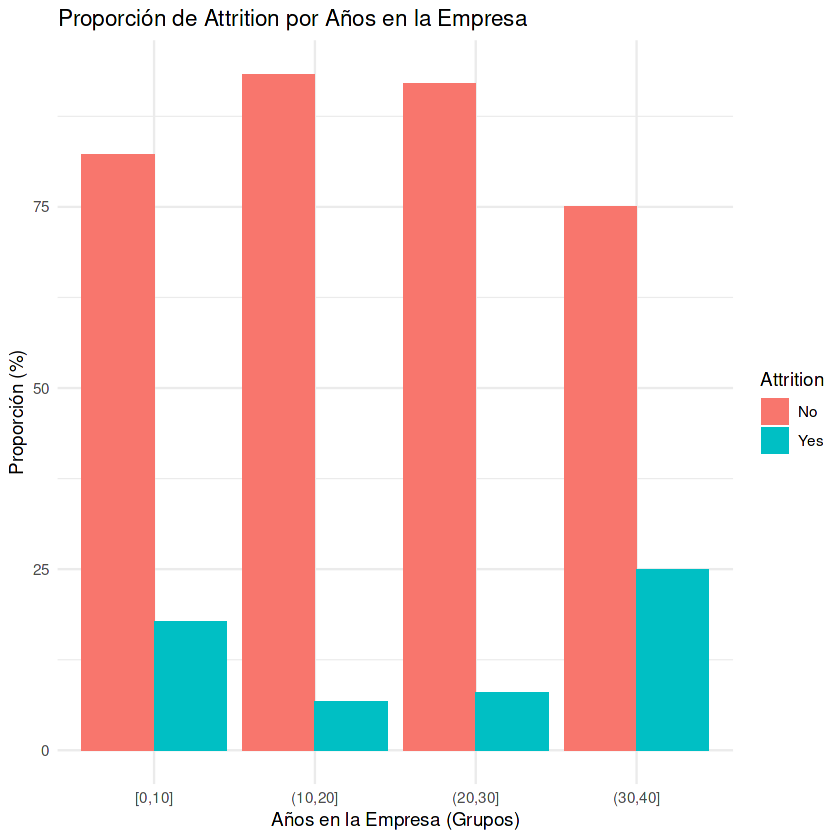

In [10]:
# Crear grupos de años en la empresa
df <- df %>%
  mutate(YearsAtCompanyGroup = cut(YearsAtCompany, breaks = seq(0, 40, by = 10), include.lowest = TRUE))

# Análisis de proporción por años en la empresa
years_at_company_attrition_prop <- df %>%
  group_by(YearsAtCompanyGroup) %>%
  mutate(total_by_years = n()) %>%
  group_by(YearsAtCompanyGroup, Attrition) %>%
  summarise(count = n(), total_by_years = first(total_by_years), .groups = "drop") %>%
  mutate(proportion = (count / total_by_years) * 100)

# Mostrar resultados
years_at_company_attrition_prop

# Visualización
ggplot(years_at_company_attrition_prop, aes(x = YearsAtCompanyGroup, y = proportion, fill = Attrition)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Proporción de Attrition por Años en la Empresa",
       x = "Años en la Empresa (Grupos)",
       y = "Proporción (%)") +
  theme_minimal()

**Los empleados con menos de 10 años en la empresa tienen una tasa de rotación del 17.73%, mientras que aquellos con más tiempo son menos propensos a dejarla (6.67% para 10-20 años). Esto sugiere que los empleados nuevos pueden estar explorando opciones laborales más activamente.**

### Rotación por nivel de trabajo

`summarise()` has grouped output by 'JobLevel'. You can override using the
`.groups` argument.


JobLevel,count,No,Yes
<int>,<int>,<dbl>,<dbl>
1,143,0.00000,26.335175
1,400,73.66483,0.000000
2,52,0.00000,9.737828
2,482,90.26217,0.000000
3,32,0.00000,14.678899
3,186,85.32110,0.000000
4,5,0.00000,4.716981
4,101,95.28302,0.000000
5,5,0.00000,7.246377


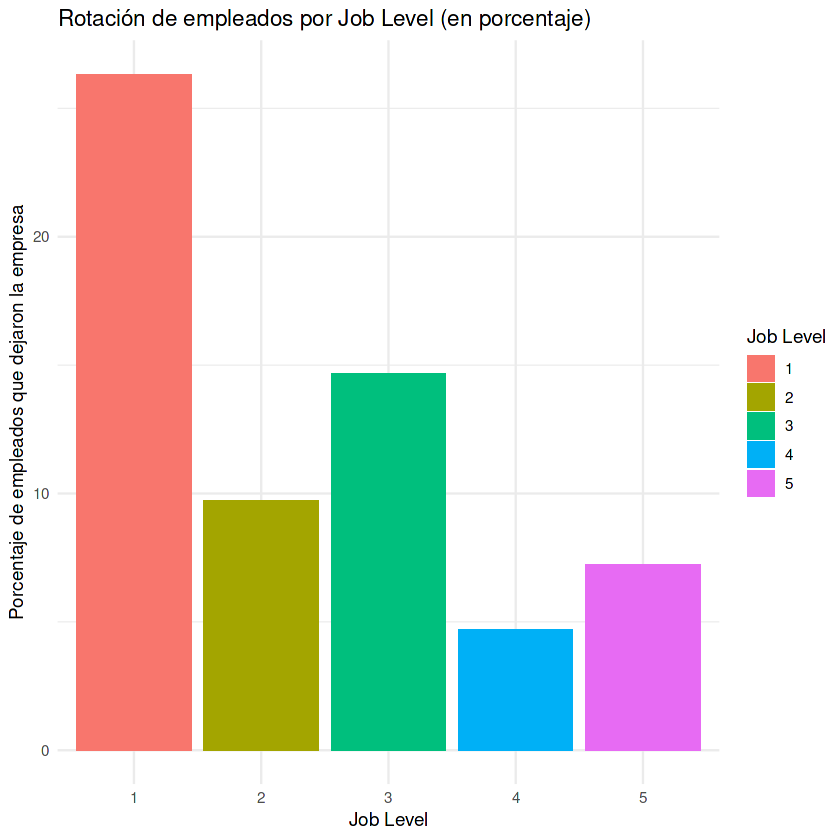

In [11]:
# Calcular la proporción de Attrition dentro de cada JobLevel en porcentaje
job_level_attrition_pct <- df %>%
  group_by(JobLevel, Attrition) %>%
  summarise(count = n()) %>%
  ungroup() %>%
  group_by(JobLevel) %>%
  mutate(percentage = (count / sum(count)) * 100) %>%
  spread(Attrition, percentage, fill = 0)  # Convertir la tabla a formato más fácil de leer

# Mostrar la tabla con la proporción de rotación en porcentaje
job_level_attrition_pct

# Crear gráfico de barras para visualizar la proporción de Attrition por JobLevel en porcentaje
ggplot(job_level_attrition_pct, aes(x = factor(JobLevel), y = `Yes`, fill = factor(JobLevel))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Rotación de empleados por Job Level (en porcentaje)", 
       x = "Job Level", 
       y = "Porcentaje de empleados que dejaron la empresa",
       fill = "Job Level") +
  theme_minimal()

**Los niveles más bajos (Job Level 1) muestran una alta tasa de rotación (26.34%), mientras que los niveles superiores (Job Level 4 y 5) tienen tasas significativamente menores (4.72% y 7.25%, respectivamente). Esto podría indicar insatisfacción en puestos iniciales o falta de oportunidades de crecimiento.**

## Análisis de correlación


Este análisis identifica qué variables numéricas tienen mayor relación con la rotación (Attrition).
Las correlaciones más fuertes (positivas o negativas) pueden revelar factores clave como edad, ingresos, o satisfacción laboral.

El gráfico de correlación muestra visualmente las relaciones entre las variables.

Warning message in cor(df_clean, use = "complete.obs"):
“the standard deviation is zero”


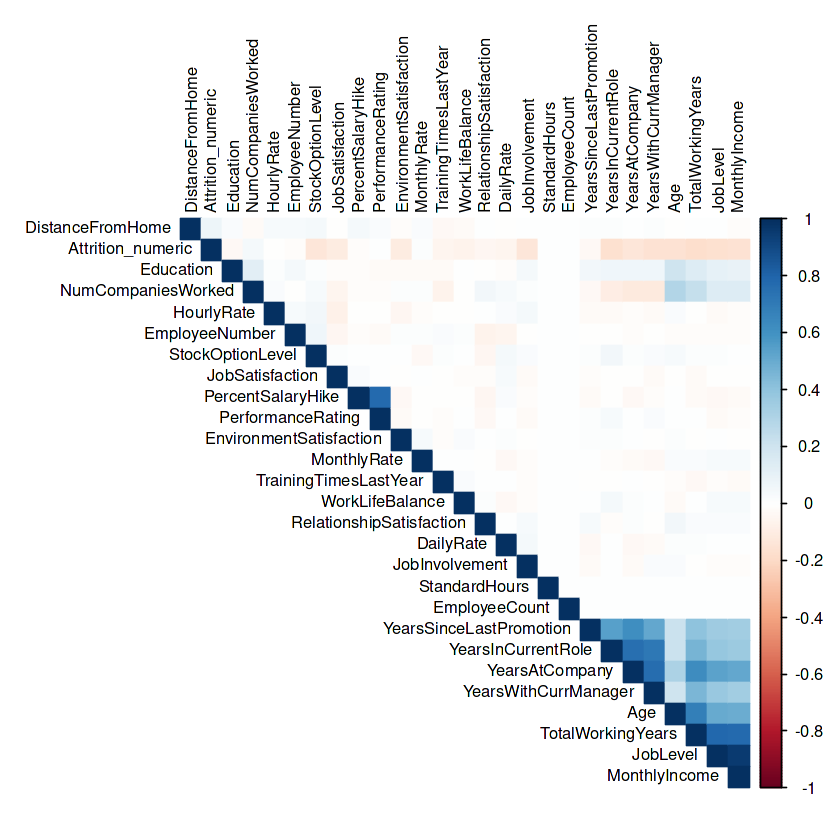

In [12]:
# Convertir Attrition a numérico (Yes = 1, No = 0)
df$Attrition_numeric <- ifelse(df$Attrition == "Yes", 1, 0)

# Seleccionar solo las variables numéricas
num_vars <- df %>%
  select(where(is.numeric))

# Eliminar filas con valores faltantes (NA)
df_clean <- na.omit(num_vars)

# Calcular la matriz de correlación sin valores faltantes
cor_matrix <- cor(df_clean, use = "complete.obs")

# Reemplazar valores Inf y NaN por 0 o NA para evitar problemas con hclust
cor_matrix[!is.finite(cor_matrix)] <- 0  # Reemplaza Inf, -Inf y NaN con 0

# Gráfico de la matriz de correlación
library(corrplot)
corrplot(cor_matrix, method = "color", type = "upper", 
         order = "hclust", tl.cex = 0.8, tl.col = "black")

**El análisis identifica variables numéricas con correlaciones significativas respecto a la rotación, como: Satisfacción laboral (Negativamente correlacionada con Attrition) e Ingresos ( Positivamente correlacionados con permanencia). Estas relaciones sugieren que mejorar la satisfacción laboral y ajustar las políticas salariales podrían ser estrategias efectivas para reducir la rotación.**

# Conclusiones

- **Tasa de Rotación Significativa:** La tasa de rotación del 16.12% indica que un número considerable de empleados deja la empresa, lo que puede afectar la productividad y los costos operativos.

- **Diferencias por Género:** Los hombres tienen una tasa de rotación ligeramente superior (17.01%) en comparación con las mujeres (14.80%), sugiriendo que podría haber diferencias en la satisfacción laboral o en las oportunidades percibidas entre géneros.

- **Relación entre Ingresos y Retención:** Los empleados con mayores ingresos tienden a permanecer más tiempo en la empresa, lo que sugiere que la compensación es un factor crítico para la retención.

- **Impacto del Trabajo Extra:** La alta tasa de rotación (30.53%) entre los empleados que trabajan horas extra indica que el estrés laboral y la sobrecarga pueden ser factores importantes en la decisión de dejar la empresa.

- **Rotación por Edad:** Los empleados más jóvenes (20-30 años) presentan una tasa de rotación del 24.39%, lo que sugiere que este grupo puede estar más dispuesto a buscar nuevas oportunidades laborales.

- **Antigüedad y Rotación:** Los empleados con menos de 10 años en la empresa tienen una tasa de rotación del 17.73%, indicando que los nuevos empleados podrían estar experimentando insatisfacción o falta de integración.

- **Nivel de Trabajo:** Los empleados en niveles más bajos (Job Level 1) tienen una tasa de rotación del 26.34%, lo que puede reflejar insatisfacción en roles iniciales o falta de oportunidades para avanzar.

- **Correlaciones Clave:** La satisfacción laboral tiene una correlación negativa con la rotación, mientras que los ingresos muestran una correlación positiva con la permanencia, destacando áreas críticas para mejorar.


# Propuestas de mejora

- **Revisión de Políticas Salariales:** Implementar revisiones salariales regulares para asegurar que los empleados estén adecuadamente compensados, especialmente aquellos en niveles iniciales y roles críticos.

- **Programas de Bienestar Laboral:** Desarrollar iniciativas para mejorar el equilibrio entre trabajo y vida personal, como flexibilidad horaria y reducción del trabajo extra, para disminuir el estrés laboral.

- **Estrategias de Retención para Jóvenes:** Diseñar programas específicos para retener a los empleados más jóvenes, incluyendo mentorías, oportunidades de desarrollo profesional y planes claros de carrera.

- **Mejoras en el Proceso de Integración:** Fortalecer el proceso de onboarding para nuevos empleados, asegurando que se sientan apoyados e integrados desde el inicio, lo cual podría reducir su propensión a abandonar la empresa.

- **Evaluaciones Regulares de Satisfacción:** Realizar encuestas periódicas sobre satisfacción laboral para identificar problemas antes de que se conviertan en razones para dejar la empresa, permitiendo ajustes proactivos.

- **Desarrollo Profesional y Capacitación:** Ofrecer oportunidades continuas para capacitación y desarrollo profesional, especialmente para empleados en niveles iniciales, fomentando un ambiente donde puedan crecer dentro de la organización.

- **Análisis Predictivo Continuo:** Implementar modelos predictivos para identificar a los empleados con mayor riesgo de abandono, permitiendo intervenciones tempranas y personalizadas.

- **Fomento del Trabajo en Equipo y Cultura Organizacional:** Promover un ambiente colaborativo donde se valore el trabajo en equipo y se reconozcan los logros individuales y colectivos, mejorando así el compromiso organizacional.